Analysis
As you get colser to the equator the temp increases
lattitude or longititude has no impact on clouds
Southern hemisphere is warmer than northern hemisphere because it's summer there and winter here

Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import seaborn as sns
import openweathermapy.core as owm
import csv
# Import API key for gmaps
#from config import gkey

#Import API for open weather
#from config import api_key
api_key = ""
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


Generate Cities List (using the starter code)

In [2]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) #this is where you change the size to get the number that you want
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

 Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}


# the header of the print log
print("Beginning Data Retrieval from OpenWeather:")
print("------------------------------------------")

# created a city dictionary to build dataframe
city_dict = {}

# created a city list of the cities found with the request
city_list = []

# row count will allow the city numbering while requesting
row_count = 1


for city in cities: 
    try:
        current_city = owm.get_current(city, **settings)
        city_dict[city] = current_city
        city_list.append(city)
        
        print(f'Processing | {city} #{row_count}')
        row_count += 1
    except:
        print("----------------------------------------------")
        print(f'{city} does not exist, searching next city...')
        print("----------------------------------------------")
        
# the footer of the print log     
print("-------------------")
print(f'Processing Complete')

Beginning Data Retrieval from OpenWeather:
------------------------------------------
Processing | udachnyy #1
Processing | bluff #2
Processing | ilulissat #3
Processing | saskylakh #4
Processing | fortuna #5
Processing | sibu #6
Processing | nioro #7
Processing | cayenne #8
Processing | georgetown #9
----------------------------------------------
taolanaro does not exist, searching next city...
----------------------------------------------
Processing | ushuaia #10
Processing | vaini #11
----------------------------------------------
wolmaranstad does not exist, searching next city...
----------------------------------------------
Processing | hermanus #12
Processing | mataura #13
Processing | punta arenas #14
Processing | rikitea #15
Processing | srednekolymsk #16
Processing | kavaratti #17
Processing | mount gambier #18
Processing | dawlatabad #19
Processing | albany #20
Processing | castro #21
Processing | khor #22
Processing | batemans bay #23
Processing | makakilo city #24
Proces

Processing | east london #186
Processing | bethel #187
Processing | tasiilaq #188
Processing | gohana #189
Processing | novobirilyussy #190
Processing | grand baie #191
----------------------------------------------
milingimbi does not exist, searching next city...
----------------------------------------------
Processing | pamanukan #192
Processing | otofuke #193
Processing | great bend #194
Processing | kahului #195
Processing | salur #196
Processing | maceio #197
----------------------------------------------
bengkulu does not exist, searching next city...
----------------------------------------------
Processing | taitung #198
Processing | jamestown #199
Processing | puerto escondido #200
Processing | aanekoski #201
Processing | kruisfontein #202
Processing | padang #203
Processing | vardo #204
Processing | paita #205
Processing | pinhao #206
Processing | mahebourg #207
Processing | cap malheureux #208
Processing | owando #209
Processing | takoradi #210
Processing | chokurdakh #211

Processing | bambous virieux #387
Processing | estelle #388
Processing | yongan #389
Processing | eregli #390
Processing | haines junction #391
Processing | dembi dolo #392
Processing | atar #393
Processing | tigil #394
Processing | port lincoln #395
Processing | oron #396
Processing | camacha #397
Processing | toro #398
Processing | cidreira #399
----------------------------------------------
olafsvik does not exist, searching next city...
----------------------------------------------
Processing | nushki #400
Processing | salym #401
Processing | birao #402
Processing | dzhebariki-khaya #403
Processing | komsomolskiy #404
Processing | caluquembe #405
Processing | faanui #406
Processing | berlevag #407
Processing | dolinsk #408
Processing | calamar #409
Processing | tuatapere #410
Processing | savannakhet #411
Processing | maniitsoq #412
Processing | harper #413
Processing | naze #414
Processing | kaili #415
Processing | coihaique #416
Processing | pontianak #417
Processing | saa #418


In [4]:
with open('cities.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in city_dict.items():
       writer.writerow([key, value])
    

In [5]:

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
name=[]
for city in city_list:
    
    city_name.append(city_dict[city]["name"])
    cloudiness.append(city_dict[city]["clouds"]["all"])
    country.append(city_dict[city]["sys"]["country"])
    date.append(city_dict[city]["dt"]) 
    humidity.append(city_dict[city]["main"]["humidity"])
    max_temp.append(city_dict[city]["main"]["temp_max"])
    lat.append(city_dict[city]["coord"]["lat"])
    lng.append(city_dict[city]["coord"]["lon"])
    wind_speed.append(city_dict[city]["wind"]["speed"])
    city_record = city_dict[city]["name"]

In [6]:
date #testing my work

[1548383400,
 1548386568,
 1548386568,
 1548386568,
 1548386569,
 1548386569,
 1548386569,
 1548384900,
 1548385200,
 1548386570,
 1548386570,
 1548385200,
 1548386570,
 1548386571,
 1548386571,
 1548386571,
 1548386571,
 1548384600,
 1548386572,
 1548383400,
 1548385200,
 1548384900,
 1548385200,
 1548386573,
 1548384960,
 1548385200,
 1548386574,
 1548386574,
 1548383340,
 1548386575,
 1548386575,
 1548385200,
 1548386575,
 1548386576,
 1548385200,
 1548386576,
 1548386576,
 1548384960,
 1548386577,
 1548386577,
 1548385200,
 1548386577,
 1548385620,
 1548385200,
 1548386578,
 1548386578,
 1548385200,
 1548386579,
 1548385200,
 1548386579,
 1548385200,
 1548385200,
 1548386580,
 1548386580,
 1548386325,
 1548385080,
 1548386581,
 1548385080,
 1548386581,
 1548386581,
 1548385200,
 1548386582,
 1548386582,
 1548384780,
 1548385200,
 1548381600,
 1548386583,
 1548386583,
 1548386583,
 1548385200,
 1548381180,
 1548385200,
 1548386584,
 1548386584]

In [6]:

newWeather = pd.DataFrame({
    "Latitude": lat,
    "Longitude": lng,
    "City Name": city_list,
    "Country": country,
    "Wind Speed": wind_speed,
    "Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
  
})

newWeather.head()

,Latitude,Longitude,City Name,Country,Wind Speed,Temperature,Humidity,Cloudiness
0,66.42,112.40,udachnyy,RU,2.95,-7.14,71,64
1,-23.58,149.07,bluff,AU,9.66,92.99,33,0
2,69.22,-51.10,ilulissat,GL,5.82,10.40,60,0
3,71.97,114.09,saskylakh,RU,3.06,-29.23,46,0
4,38.18,-1.13,fortuna,ES,1.12,50.00,65,0


Convert Raw Data to DataFrame



 Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

 Latitude vs. Temperature Plot

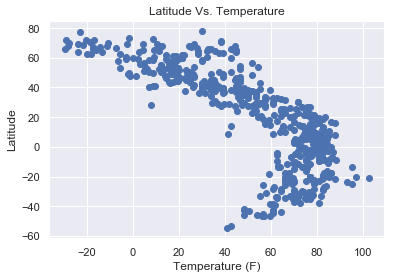

In [15]:
#Latitude Vs Temperature Scatter Plot
plt.scatter(newWeather["Temperature"],newWeather["Latitude"],marker ="o")
plt.title("Latitude Vs. Temperature")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
sns.set()
plt.show()

 Latitude vs. Humidity Plot

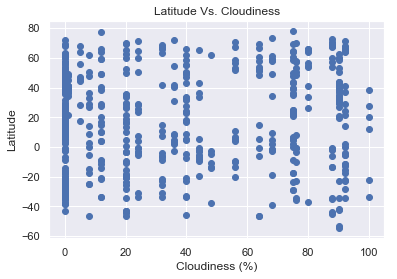

In [14]:
#Cloudiness Vs. Latitude Scatter Plot
plt.scatter(newWeather["Cloudiness"],newWeather["Latitude"],marker ="o")
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
sns.set()
plt.show()

 Latitude vs. Cloudiness Plot

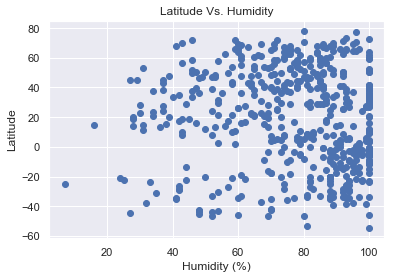

In [13]:
#Humidity Vs. Latitude Scatter Plot
plt.scatter(newWeather["Humidity"],newWeather["Latitude"],marker ="o")
plt.title("Latitude Vs. Humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
sns.set()
plt.show()

 Latitude vs. Wind Speed Plot

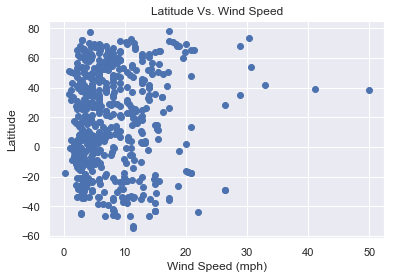

In [12]:
#Wind Speed Vs. Latitude Scatter Plot
plt.scatter(newWeather["Wind Speed"],newWeather["Latitude"],marker ="o")
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
sns.set()
plt.show()